# REQUERIMIENTOS

In [ ]:
!pip install pillow

# MODULOS

In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA

# DATOS

## FUNCION 3D DE INTERES

In [ ]:
# Generate data for a hyperbolic paraboloid
a = 1
b = 1
u = np.linspace(-10, 10, 50)
v = np.linspace(-10, 10, 50)
U, V = np.meshgrid(u, v)

X = a * U
Y = b * V
Z1 = (U**2 / a**2) - (V**2 / b**2)
R = np.sqrt((U**2) + (V**2))
Z2 = (np.sin(R)/R)*100

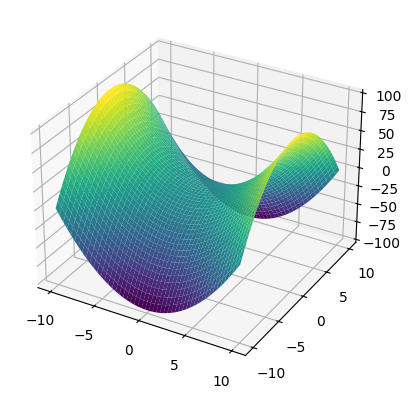

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1,cmap='viridis', edgecolor='none')
plt.show()

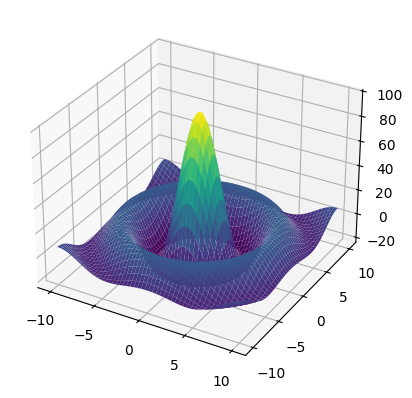

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z2,cmap='viridis', edgecolor='none')
plt.show()

## FUNCION DE OSCILACION

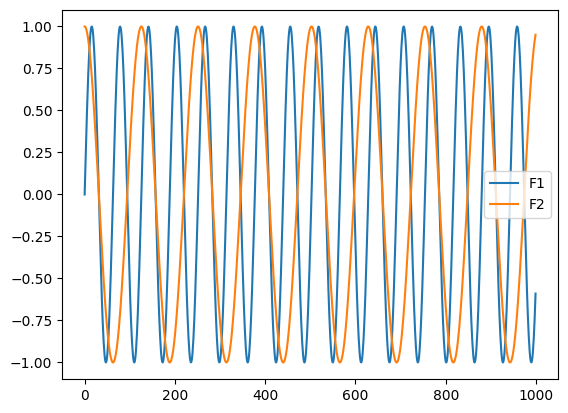

In [ ]:
n = 1000
tiempo = np.arange(0, n, 1)
F1 = np.sin(tiempo/10)
F2 = np.cos(tiempo/20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tiempo, F1, label='F1')
ax.plot(tiempo, F2, label='F2')
ax.legend()

## OSCILACIÓN

In [ ]:
z_values = np.zeros((len(F1), X.shape[0], Y.shape[0]))
for t in range(len(F1)):
    z_values[t] = Z1 * F1[t] + Z2 * F2[t]
max_z = np.max(np.abs(Z1)) * 1.5

In [ ]:
# Configuración de la figura y los ejes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Configuración de ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-max_z, max_z)

def update(frame):
    # Limpiar la superficie anterior
    ax.clear()

    # Restablecer límites y etiquetas después de clear()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(-max_z, max_z)

    # Usar el valor de F directamente (con manejo circular de índices)
    current_f = F[frame % len(F)]

    # Actualizar la superficie usando F
    Z_t = Z * current_f  # Multiplicamos Z por el valor actual de F

    # Dibujar la nueva superficie
    surf = ax.plot_surface(X, Y, Z_t, cmap='viridis', edgecolor='none',vmin=Z.min(),vmax=Z.max())

    # Actualizar el título con el tiempo correspondiente
    current_time = tiempo[frame % len(tiempo)]
    ax.set_title(f'Tiempo: {current_time}, Factor F: {current_f:.2f}')

    return [surf]

# Crear la animación (usando la longitud de F o tiempo como referencia)
frames_count = len(tiempo)  # O len(F) si tienen la misma longitud
ani = FuncAnimation(fig, update, frames=range(frames_count), interval=50)

# Guardar la animación
ani.save('superficie.gif', writer='pillow', fps=20)
plt.close(fig)

# PCA - EOF -Algebra Lineal

## Redimensionar datos

In [ ]:
z_values.shape

(1000, 50, 50)

In [ ]:
stack_z_values = z_values.reshape(len(F1), -1) #Siempre se tienen que poner en dos dimensiones
stack_z_values.shape

(1000, 2500)

## Matriz de Covarianza Temporal (MCT)

In [ ]:
matriz_cov_time = np.dot(stack_z_values.T,stack_z_values) #Mismas dimensiones espaciales
matriz_cov_time.shape

(2500, 2500)

## Matriz de Covarianza Espacial (MCS)

In [ ]:
matriz_cov_space = np.dot(stack_z_values,stack_z_values.T) #Mismas dimensiones temporales
matriz_cov_space.shape

(1000, 1000)

## Vectores Y Valores Propios

In [ ]:
val_p_time  , vec_p_time  = linalg.eig(matriz_cov_time) #No debi hacer esto
val_p_space , vec_p_space = linalg.eig(matriz_cov_space)

In [ ]:
print(val_p_time.shape,val_p_space.shape)

(2500,) (1000,)


Text(0.5, 1.0, 'Porcentaje de varianza')

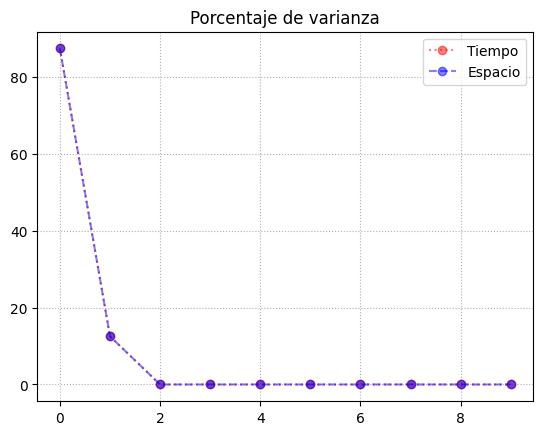

In [ ]:
plt.plot(((val_p_time.real/np.sum(val_p_time.real))*100)[0:10],alpha=.5,color='red',ls='dotted',marker='o',label='Tiempo')
plt.plot(((val_p_space.real/np.sum(val_p_space.real))*100)[0:10],alpha=.5,color='blue',ls='dashed',marker='o',label='Espacio')
plt.legend()
plt.grid(ls='dotted')
plt.title('Porcentaje de varianza')

## Modos de oscilación (MCT)

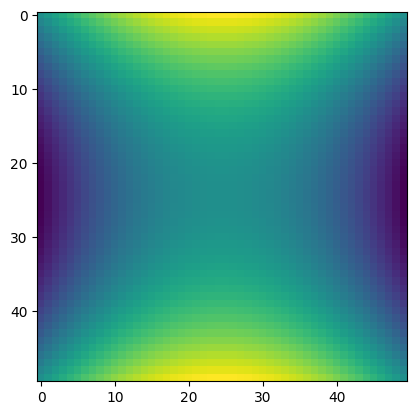

In [ ]:
plt.imshow(vec_p_time[:,0].real.reshape(len(X),len(Y))) #Primer modo de oscilación

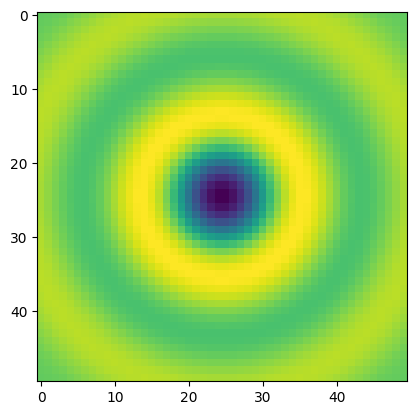

In [ ]:
plt.imshow(vec_p_time[:,1].real.reshape(len(X),len(Y))) #Segundo modo de oscilación

### Proyección en el nuevo espacio vectorial

In [ ]:
reproyeccion = np.dot(vec_p_time[:,0].real,stack_z_values.T) #Proyectamos los Datos en el primer modo de osccilacion
reproyeccion.shape

(1000,)

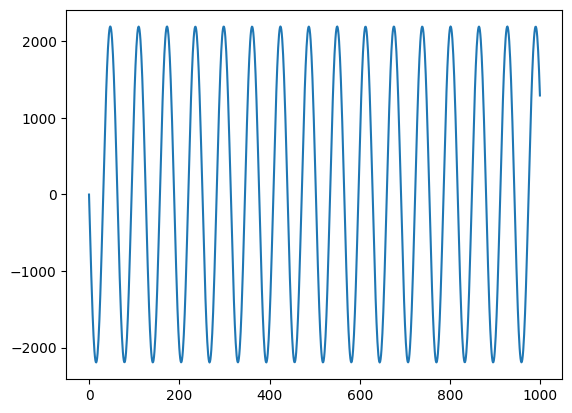

In [ ]:
plt.plot(reproyeccion)

## Modos de Oscilacion (MCS)

In [ ]:
vec_p_space[:,0].shape

(1000,)

<ipython-input-109-5c8b9f91b1d2>:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Porcentaje de varianza')

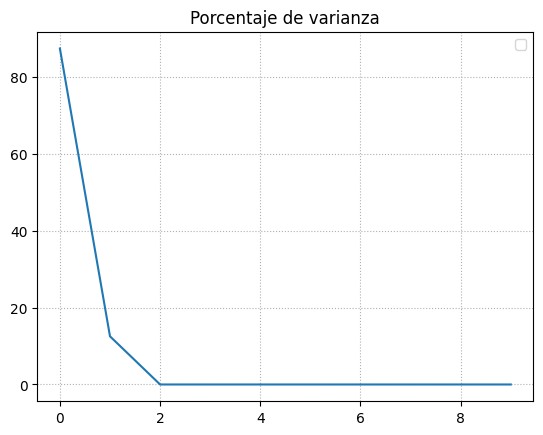

In [ ]:
plt.plot(val_p_space.real[0:10]/np.sum(val_p_space.real)*100 )
plt.legend()
plt.grid(ls='dotted')
plt.title('Porcentaje de varianza')

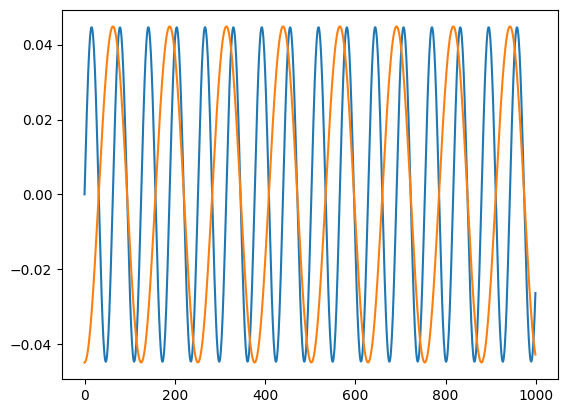

In [ ]:
plt.plot(vec_p_space.real[:,0])
plt.plot(-vec_p_space.real[:,1]) #Puede Cambiar el sentido pero la amplitud es la misma

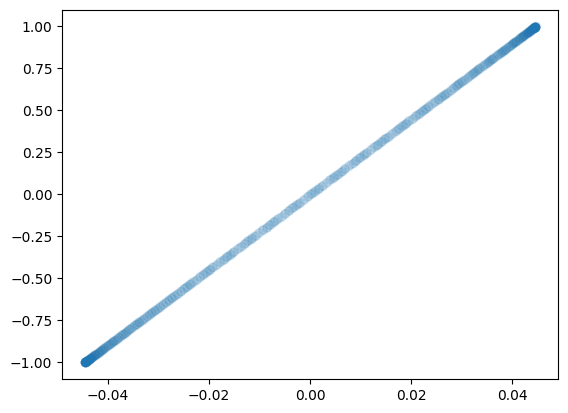

In [ ]:
plt.scatter(vec_p_space.real[:,0],F1,alpha=.05)

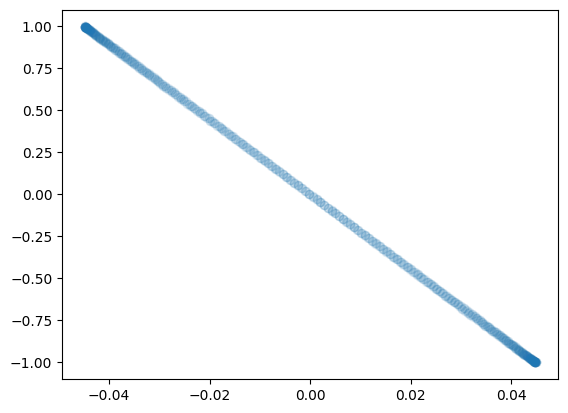

In [ ]:
plt.scatter(-vec_p_space.real[:,1],F2,alpha=.05)

In [ ]:
Z2.shape

(50, 50)

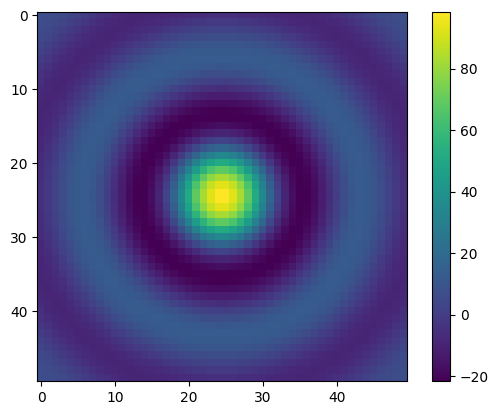

In [ ]:
plt.imshow(Z2)
plt.colorbar()

In [ ]:
reproyeccion_2 = np.dot(vec_p_space[:,0],stack_z_values)
reproyeccion_3 = np.dot(vec_p_space[:,1],stack_z_values)
reproyeccion_2.shape

(2500,)

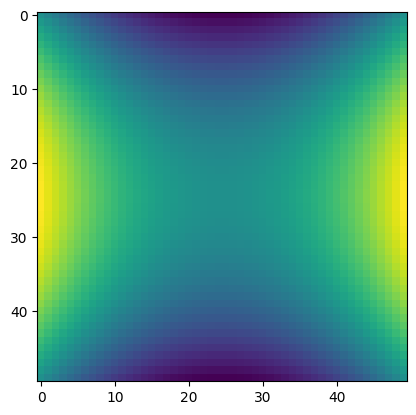

In [ ]:
plt.imshow(reproyeccion_2.real.reshape(len(X),len(Y)))

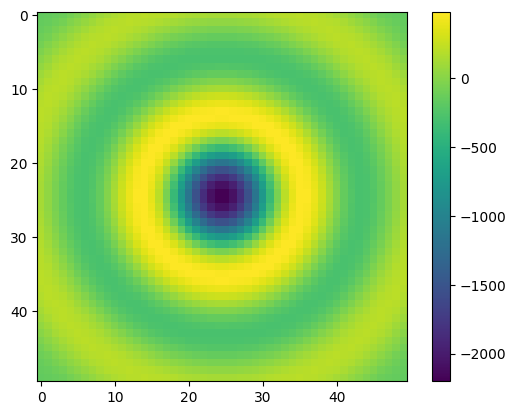

In [ ]:
plt.imshow(-reproyeccion_3.real.reshape(len(X),len(Y)))
plt.colorbar()

In [ ]:
mean_x = np.mean(z_values, axis=2)
mean_y = np.mean(z_values, axis=1)
print(mean_x.shape,mean_y.shape)

(1000, 50) (1000, 50)


# PCA - EOF - Sklearn

In [ ]:
pca = PCA()
pca.fit(stack_z_values)

PCA()

In [ ]:
transformed_data = pca.transform(stack_z_values)

In [ ]:
transformed_data.shape #Dimesiones temporales (1000x1000)

(1000, 1000)

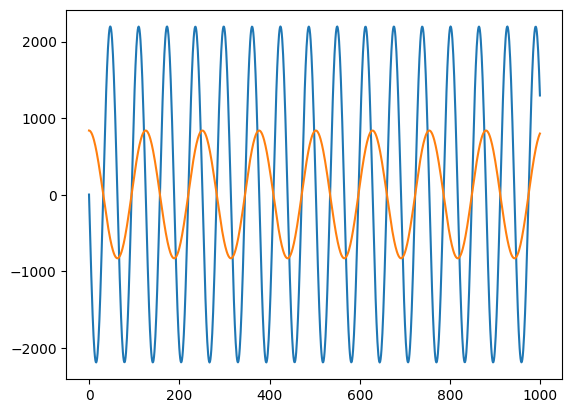

In [ ]:
plt.plot(transformed_data[:,0]) # Primer modo de oscilacion
plt.plot(transformed_data[:,1]) # Segundo modo de oscilacion

In [ ]:
pca.components_.shape

(1000, 2500)

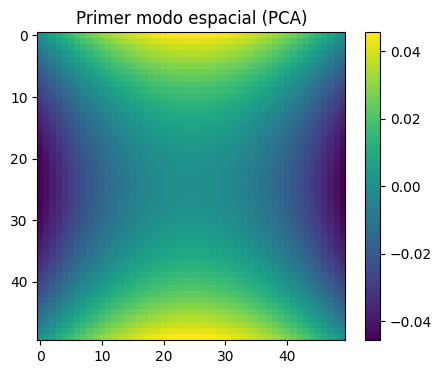

In [ ]:
first_spatial_mode = pca.components_[0,:].reshape(X.shape[0], Y.shape[0])
plt.figure(figsize=(5, 4))
plt.imshow(first_spatial_mode)
plt.colorbar()
plt.title('Primer modo espacial (PCA)')
plt.show()

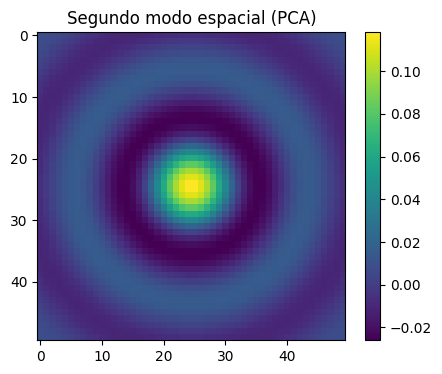

In [ ]:
second_spatial_mode = pca.components_[1,:].reshape(X.shape[0], Y.shape[0])
plt.figure(figsize=(5, 4))
plt.imshow(second_spatial_mode)
plt.colorbar()
plt.title('Segundo modo espacial (PCA)')
plt.show()